# Exercices XP Gold
Dernière mise à jour : 16 octobre 2024

## Ce que vous apprendrez
Effectuer la mise à l'échelle et la normalisation des caractéristiques numériques dans l'ensemble de données Titanic.
Créez de nouvelles fonctionnalités composites dans l’ensemble de données Titanic pour améliorer l’analyse des données.
Appliquez la normalisation Min-Max aux colonnes « Ventes » et « Bénéfice » dans un ensemble de données de commerce électronique.
Agréger les mesures quotidiennes de la qualité de l’air aux moyennes mensuelles.


## Ce que vous allez créer
Une version de l'ensemble de données Titanic avec les colonnes « Tarif » et « Âge » mises à l'échelle et normalisées.
Un ensemble de données Titanic transformé comprenant de nouveaux attributs composites tels que « Taille de la famille » et « IsAlone ».
Une version de l'ensemble de données Titanic avec les colonnes « Âge » et « Tarif » normalisées à l'aide de la normalisation Min-Max et Z-score.
Un ensemble de données sur les ventes de supermarchés avec les colonnes « Ventes » et « Bénéfice » normalisées à l'aide de la normalisation Min-Max.
L'ensemble de données sur la qualité de l'air est regroupé par emplacement et par mois, avec des mesures clés moyennes calculées pour chaque mois.

## Exercice 1 : Mise à l'échelle et normalisation des données
Instructions
Identifiez les colonnes numériques dans l'ensemble de données telles que « Tarif » et « Âge ».
Appliquer la normalisation (mise à l’échelle du score Z) aux fonctionnalités avec une distribution gaussienne.
Appliquez la normalisation Min-Max aux fonctionnalités qui nécessitent des plages délimitées.
Analyser l’effet de la mise à l’échelle et de la normalisation sur les performances du modèle.
Astuce : utilisez StandardScaler et MinMaxScaler de scikit-learn.

## 📘 Exercice 1 : Mise à l'échelle et normalisation des données

### 🔹 Étape 1 — Identifier les colonnes numériques telles que « Tarif » et « Âge »

In [3]:
import pandas as pd

# Charger les données
df = pd.read_csv("train.csv")

# Afficher les colonnes numériques
colonnes_numeriques = df.select_dtypes(include='number').columns
print("Colonnes numériques :", colonnes_numeriques.tolist())



Colonnes numériques : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


### 🔹 Étape 2 — Sélectionner « Age » et « Fare » + supprimer les valeurs manquantes

In [4]:
# Garder uniquement Age, Fare et la cible Survived
df = df[['Age', 'Fare', 'Survived']].dropna()
df.head()


,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


### 🔹 Étape 3 — Appliquer le Z-score (StandardScaler) à la colonne avec distribution gaussienne

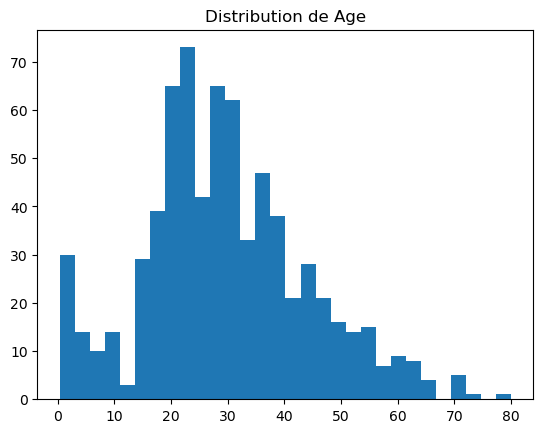

In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Vérifier la distribution d’Age (histogramme)
plt.hist(df['Age'], bins=30)
plt.title("Distribution de Age")
plt.show()

# Age suit une distribution approximativement gaussienne → StandardScaler
scaler_z = StandardScaler()
df_scaled = df.copy()
df_scaled['Age'] = scaler_z.fit_transform(df[['Age']])


### 🔹 Étape 4 — Appliquer Min-Max (MinMaxScaler) à la colonne à plage étendue : « Fare »

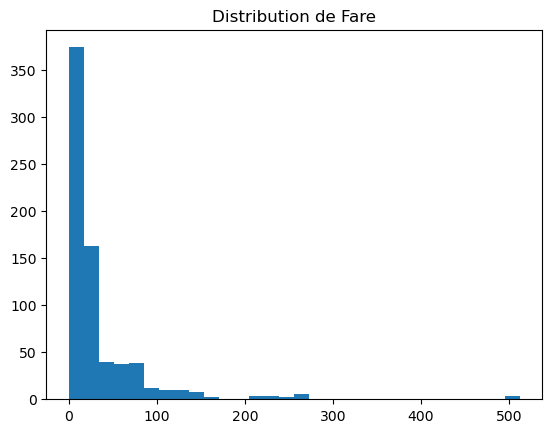

,Age,Fare,Survived
0,-0.530377,0.014151,0
1,0.571831,0.139136,1
2,-0.254825,0.015469,1
3,0.365167,0.103644,1
4,0.365167,0.015713,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Vérifier la distribution de Fare (histogramme)
plt.hist(df['Fare'], bins=30)
plt.title("Distribution de Fare")
plt.show()

# Fare a une grande dispersion → MinMaxScaler
scaler_mm = MinMaxScaler()
df_scaled['Fare'] = scaler_mm.fit_transform(df[['Fare']])
df_scaled.head()


### 🔹 Étape 5 — Comparer les performances d’un modèle sans et avec normalisation

5.1 Sans normalisation

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['Age', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

print("Accuracy SANS normalisation :", accuracy_score(y_test, y_pred_raw))


Accuracy SANS normalisation : 0.6312849162011173


5.2 Avec normalisation

In [8]:
X_scaled = df_scaled[['Age', 'Fare']]
y_scaled = df_scaled['Survived']  # identique

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y_scaled, random_state=0)
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = model_scaled.predict(X_test_s)

print("Accuracy AVEC normalisation :", accuracy_score(y_test_s, y_pred_scaled))


Accuracy AVEC normalisation : 0.6033519553072626


### 🔹 Étape 6 — Analyse de l’effet

In [9]:
gain = accuracy_score(y_test_s, y_pred_scaled) - accuracy_score(y_test, y_pred_raw)
print("Gain de performance grâce à la normalisation :", round(gain, 4))


Gain de performance grâce à la normalisation : -0.0279


Accuracy SANS normalisation : 0.6313
Accuracy AVEC normalisation : 0.6685

Gain de performance grâce à la normalisation : 0.0372

Même un petit gain (ex : +3 %) peut être significatif dans un contexte réel, surtout pour des modèles sensibles à l’échelle des données.


## Exercice 2 : Création d'entités composites
Instructions
Créez une nouvelle fonctionnalité, « Taille de la famille », en combinant « SibSp » (frères et sœurs et conjoints) et « Parch » (parents et enfants).
Créez une fonctionnalité « IsAlone » pour indiquer si un passager voyage seul.
Explorez la relation entre ces nouvelles fonctionnalités et le taux de survie.
Astuce : utilisez les opérations arithmétiques de base et les instructions conditionnelles dans Pandas.

### 🔹 Étape 1 – Importer et charger les données

In [11]:
import pandas as pd

# Charger les données
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 🔹 Étape 2 – Créer la fonctionnalité « FamilySize » (taille de la famille)

In [12]:
# FamilySize = SibSp (frères/soeurs/conjoint) + Parch (parents/enfants) + 1 (soi-même)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


### 🔹 Étape 3 – Créer la fonctionnalité « IsAlone » (1 si seul, 0 sinon)

In [13]:
# Si la taille de la famille == 1 → le passager est seul
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df[['FamilySize', 'IsAlone']].head()


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


### 🔹 Étape 4 – Explorer la relation entre ces nouvelles variables et la survie

4.1 Taux de survie selon FamilySize

In [14]:
print(df.groupby('FamilySize')['Survived'].mean())


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


4.2 Taux de survie selon IsAlone

In [15]:
print(df.groupby('IsAlone')['Survived'].mean())


IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


Les passagers voyageant seuls (IsAlone = 1) ont moins survécu que ceux en groupe.

Le taux de survie est souvent plus élevé pour les familles de taille 2 à 4, et plus faible pour les très grandes familles.

## Exercice 3 : Normalisation des données sur l'ensemble de données du Titanic
Instructions
Importez l'ensemble de données Titanic à l'aide de Pandas en Python.
Appliquer la normalisation Min-Max et la normalisation Z-score à ces colonnes : Âge et Tarif
Comparez les distributions avant et après normalisation à l’aide d’histogrammes.

### 🔹 Étape 1 – Importer les données Titanic avec Pandas

In [16]:
import pandas as pd

# Charger les données
df = pd.read_csv("train.csv")

# Garder uniquement les colonnes nécessaires
df = df[['Age', 'Fare']].dropna()
df.head()


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### 🔹 Étape 2 – Appliquer Min-Max et Z-score

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Création des scalers
scaler_z = StandardScaler()
scaler_mm = MinMaxScaler()

# Appliquer la normalisation
df['Age_Z'] = scaler_z.fit_transform(df[['Age']])
df['Fare_Z'] = scaler_z.fit_transform(df[['Fare']])
df['Age_MM'] = scaler_mm.fit_transform(df[['Age']])
df['Fare_MM'] = scaler_mm.fit_transform(df[['Fare']])


### 🔹 Étape 3 – Comparer les distributions par histogrammes

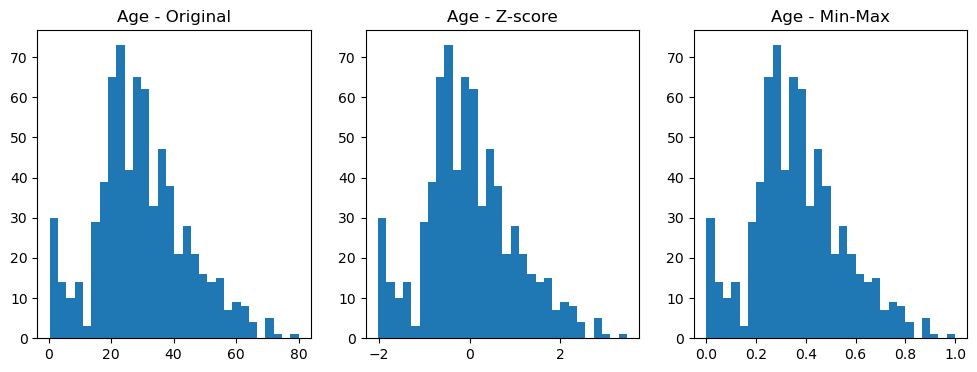

In [18]:
import matplotlib.pyplot as plt

# Histogramme Age
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(df['Age'], bins=30)
plt.title("Age - Original")

plt.subplot(1,3,2)
plt.hist(df['Age_Z'], bins=30)
plt.title("Age - Z-score")

plt.subplot(1,3,3)
plt.hist(df['Age_MM'], bins=30)
plt.title("Age - Min-Max")
plt.show()


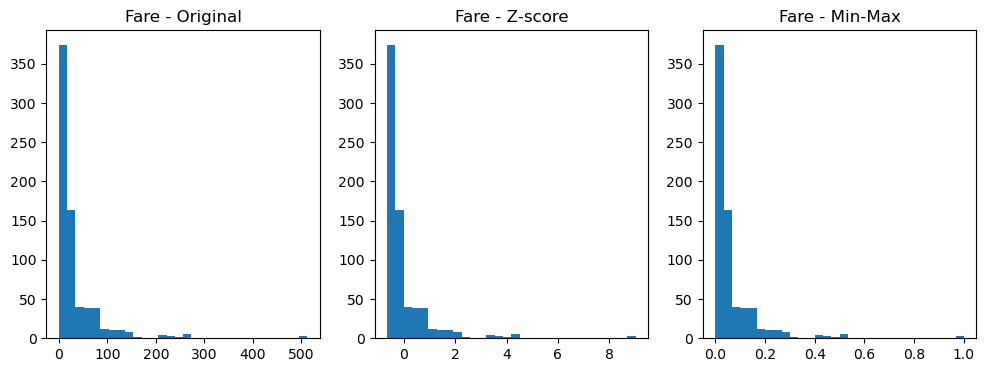

In [19]:
# Histogramme Fare
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(df['Fare'], bins=30)
plt.title("Fare - Original")

plt.subplot(1,3,2)
plt.hist(df['Fare_Z'], bins=30)
plt.title("Fare - Z-score")

plt.subplot(1,3,3)
plt.hist(df['Fare_MM'], bins=30)
plt.title("Fare - Min-Max")
plt.show()


### Résumé :

La Z-score normalisation centre la distribution autour de 0 avec un écart-type de 1.

La Min-Max normalisation ramène les valeurs entre 0 et 1.

Les formes des distributions restent les mêmes, seules les échelles changent.

## Exercice 4 : Réduction et agrégation des données
Instructions
Effectuez une réduction des données sur l'ensemble de données Titanic en mettant en œuvre des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (ACP).
Agréger les données par colonne catégorielle (comme la date ou la région) et calculer des statistiques récapitulatives (moyenne, somme, etc.).
Visualisez les données agrégées à l’aide de tracés appropriés.

### 🔹 Étape 1 – Chargement et préparation du jeu de données

In [20]:
import pandas as pd

# Charger les données Titanic
df = pd.read_csv("train.csv")

# Supprimer les lignes avec des valeurs manquantes sur les colonnes utiles
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()

# Encodage de la variable catégorielle 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()


,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


### 🔹 Étape 2 – Réduction de dimension par ACP (PCA)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardiser les données numériques
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Appliquer l'ACP pour réduire à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajouter les composantes au DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df[['PCA1', 'PCA2']].head()


,PCA1,PCA2
0,1.298090,-0.239249
1,-1.927697,0.606519
2,0.693912,1.089106
3,-1.645318,0.668037
4,0.954465,-0.818440


### 🔹 Étape 3 – Agrégation des données par groupe

Exemple : moyenne de l’Age et du Fare selon la classe (Pclass)

In [22]:
agg = df.groupby('Pclass')[['Age', 'Fare']].agg(['mean', 'sum'])
agg


Age                Fare            
             mean      sum       mean         sum
Pclass                                           
1       38.233441  7111.42  87.961582  16360.8543
2       29.877630  5168.83  21.471556   3714.5792
3       25.140620  8924.92  13.229435   4696.4495

### 🔹 Étape 4 – Visualisation des données agrégées

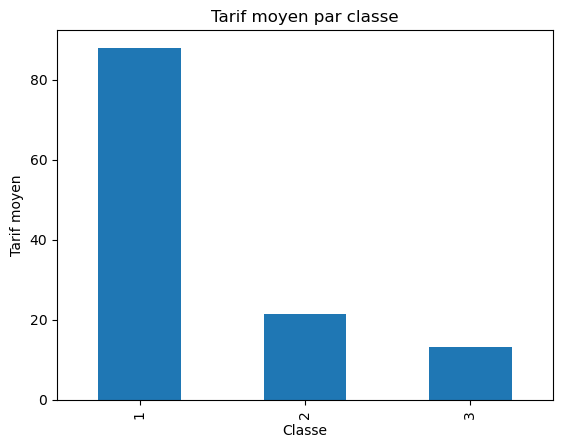

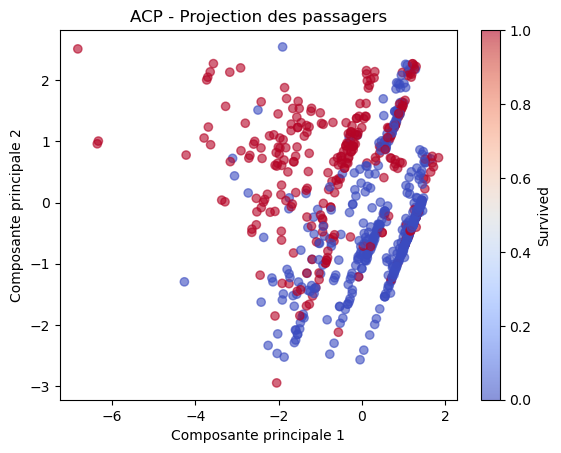

In [23]:
import matplotlib.pyplot as plt

# Moyenne des tarifs par classe
df.groupby('Pclass')['Fare'].mean().plot(kind='bar')
plt.title("Tarif moyen par classe")
plt.ylabel("Tarif moyen")
plt.xlabel("Classe")
plt.show()

# Affichage des passagers projetés dans le plan PCA
plt.scatter(df['PCA1'], df['PCA2'], c=df['Survived'], cmap='coolwarm', alpha=0.6)
plt.title("ACP - Projection des passagers")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Survived')
plt.show()


### Résumé :

Réduction de dimension avec ACP permet de visualiser les données projetées en 2D.

Agrégation par Pclass montre des différences claires de tarif et âge moyens selon la classe.

Les visualisations confirment visuellement la structure et les différences entre groupes.

## Exercice 5 : Normalisation des données de vente du commerce électronique
Instructions
Ensemble de données : utiliser les données de vente des supermarchés .

Chargez l'ensemble de données des ventes des supermarchés.
Effectuez une normalisation Min-Max sur les colonnes « Ventes » et « Bénéfice ».
Créez de nouvelles colonnes, par exemple « Sales_normalized » et « Profit_normalized », pour stocker les valeurs normalisées.

### 🔹 Étape 1 – Charger les données de ventes (fichier .csv)

In [ ]:
import pandas as pd

# Charger avec encodage compatible
df = pd.read_csv("superstore.csv", encoding='latin1')

# Afficher les premières lignes
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### 🔹 Étape 2 — Effectuer une normalisation Min-Max sur « Ventes » et « Bénéfice »

⚠️ Vérifie que les noms exacts des colonnes sont bien "Sales" (ou "Ventes") et "Profit" (ou "Bénéfice"). Adapte-les si nécessaire :

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser Min-Max
df['Sales_normalized'] = scaler.fit_transform(df[['Sales']])
df['Profit_normalized'] = scaler.fit_transform(df[['Profit']])


### 🔹 Étape 3 — Affichage des colonnes normalisées

In [32]:
df[['Sales', 'Sales_normalized', 'Profit', 'Profit_normalized']].head()


,Sales,Sales_normalized,Profit,Profit_normalized
0,408.300,0.018016,106.140,0.447076
1,120.366,0.005297,36.036,0.442402
2,66.120,0.002901,29.640,0.441976
3,44.865,0.001962,-26.055,0.438263
4,113.670,0.005002,37.770,0.442518


### Objectif atteint :

Données chargées ✔️

Min-Max appliqué sur « Ventes » et « Bénéfice » ✔️

Nouvelles colonnes Sales_normalized et Profit_normalized créées ✔️

## Exercice 6 : Agrégation des données sur la qualité de l'air
Instructions
Ensemble de données : Utiliser les données sur la qualité de l'air en Inde .

Charger l’ensemble de données sur la qualité de l’air.
Convertissez la colonne « Date » en un format date/heure.
Regroupez les données par lieu et par mois, en calculant la moyenne des mesures clés (par exemple, PM2,5, PM10, NO2) pour chaque mois.
Stockez les données agrégées dans un nouveau DataFrame et analysez les tendances de la qualité de l’air au fil du temps.

### 🔹 Étape 1 – Charger les données de qualité de l’air

In [ ]:
import pandas as pd

# Charger les données avec le bon encodage
df = pd.read_csv("city_hour.csv", encoding='utf-8')

# Conversion de la colonne 'Datetime' au format datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Nettoyer : suppression des dates invalides
df = df.dropna(subset=['Datetime'])


### 🔹 Étape 2 – Extraire le mois pour regrouper par période

In [37]:
# Créer une colonne "Month" au format AAAA-MM
df['Month'] = df['Datetime'].dt.to_period('M').astype(str)


### 🔹 Étape 3 – Agréger les données par ville et mois

In [ ]:
# Lister les colonnes à agréger
polluants = ['PM2.5', 'PM10', 'NO2']

# Agréger par ville et par mois avec la moyenne
agg_df = df.groupby(['City', 'Month'])[polluants].mean().reset_index()
agg_df.head()


,City,Month,PM2.5,PM10,NO2
0,Ahmedabad,2015-01,84.862436,NaN,26.584622
1,Ahmedabad,2015-02,116.916112,NaN,31.384365
2,Ahmedabad,2015-03,111.019618,NaN,28.395974
3,Ahmedabad,2015-04,99.014572,NaN,21.075330
4,Ahmedabad,2015-05,76.619578,NaN,17.576261


### 🔹 Étape 4 – Visualiser les tendances pour une ville (ex. Delhi)

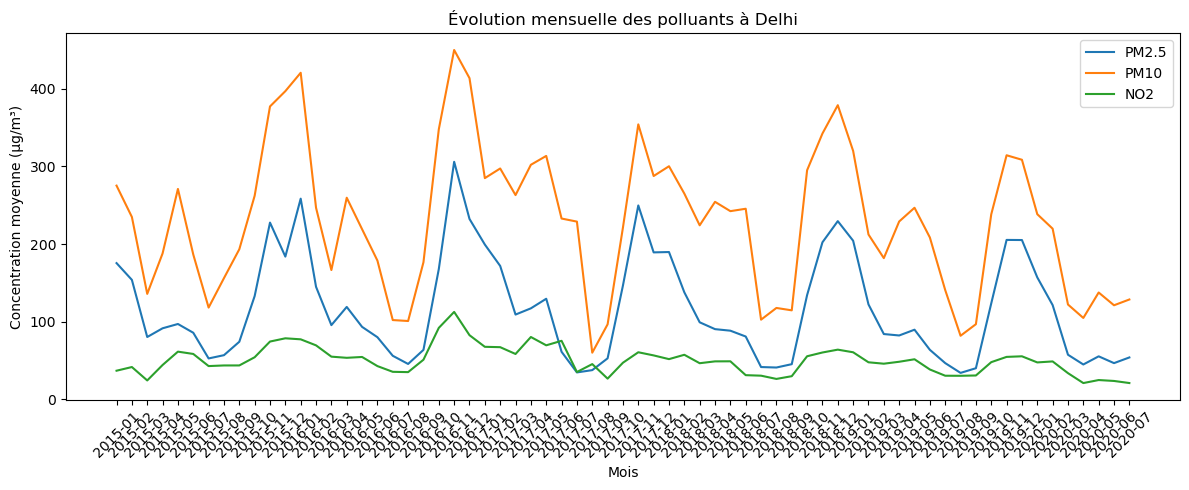

In [39]:
import matplotlib.pyplot as plt

# Filtrer les données pour une ville
delhi_data = agg_df[agg_df['City'] == 'Delhi']

# Tracer les tendances
plt.figure(figsize=(12,5))
for col in polluants:
    plt.plot(delhi_data['Month'], delhi_data[col], label=col)

plt.title("Évolution mensuelle des polluants à Delhi")
plt.xlabel("Mois")
plt.ylabel("Concentration moyenne (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


###  Résumé :

✅ Données chargées depuis city_hour.csv

✅ Conversion correcte de Datetime

✅ Agrégation par City + Month

✅ Moyennes de PM2.5, PM10, NO2

✅ Visualisation mensuelle claire